# Développement logiciel - HMMA 238


##     Travaux Pratiques Python 

####    Mégane BOYER & Emeline Toustou

# EXERCICE 1: Le jeu de la vie

## Implémentation sans numpy

Nous définissons la fonction $calcul\_nb\_voisins$ dans le fichier utils.py, puis nous l'appelons.

In [1]:
from utils import calcul_nb_voisins

### Question 4 :

Nous allons appliquer la fonction $calcul\_nb\_voisins$ à la liste (de listes) Z suivante et expliquer ce que représente la sortie $N=calcul\_nb\_voisins(Z)$. Nous rappelons que les cellules vivantes sont codées par des 1, les cellules mortes par des 0, et que le pourtour de la grille est supposé toujours inactif (mort).

In [14]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

Z

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [3]:
N = calcul_nb_voisins(Z)

N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

L'entrée de la fonction $N=calcul\_nb\_voisins(Z)$ est une liste (de listes), composée de 0 et de 1, représentant l'état du jeu de la vie. La sortie $N=calcul\_nb\_voisins(Z)$ est une liste de listes qui représente le nombre de voisins vivants de chaque cellule (de Z) n'appartenant pas au pourtour de la grille. En effet, nous avons supposé que le pourtour de la grille est toujours mort : cette fonction ne s'applique donc pas (conserve les 0) aux cellules du pourtour. Chaque cellule possède au plus 8 cellules voisines vivantes dans son entourage. 

Prenons un exemple : la cellule vivante à la troisième ligne et quatrième colonne de Z possède un voisin vivant au dessus d'elle, un autre en dessous, et un dernier en bas en gauche. Si nous regardons la valeur située à la position correspondante (ligne 3, colonne 4) dans N, nous constatons que cette cellule a effectivement trois voisins vivants.

Nous définissons maintenant la fonction $iteration\_jeu$ dans le fichier utils.py.
Cette fonction prend en argument une liste de listes représentant l'état initial du jeu. Elle retourne l'état de ce dernier après une étape du jeu de la vie, c'est-à-dire l'état de chaque cellule (vivante : 1, morte : 0) après une itération du jeu. Nous affichons la docstring de cette fonction puis nous appliquons cette dernière à la liste Z, définie précédemment.

In [4]:
from utils import iteration_jeu

help(iteration_jeu)

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Entrée : Prend en argument une liste de (listes) représentant l'état initial du jeu. 
    Sortie : Retourne une liste de listes correspondant à l'état du jeu à l'étape suivante .
    
    Pour chaque cellule qui n'est pas sur le pourtour de la grille (considéré toujours mort), 
    iteration_jeu détermine le nouvel état de la cellule (vivante ou morte)
    en fonction de son nombre de voisins vivants, calculé par la fonction calcul_nb_voisins.
    
    Une cellule morte avec trois voisins vivants exactement nait (naissance).
    Une cellule vivante ayant deux ou trois voisins vivants reste en vie (équilibre).
    Une cellule vivante ayant au moins quatre voisins vivants meurt par étouffement.
    Une cellule vivante ayant zero ou un voisin vivant meurt par isolement.



In [5]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Reprenons l'exemple de la cellule située à la troisième ligne et quatrième colonne. A l'issue d'une itération du jeu de la vie (sortie de la fonction), nous constatons qu'elle est toujours vivante, ce qui est le résultat attendu car elle possède trois voisins vivants. Nous pouvons aussi observer, par exemple, la naissance de la cellule située à la troisième ligne et cinquième colonne car celle-ci possèdait exactement trois voisins vivants à l'étape précédente du jeu de la vie.

### Question 5 :

Dans cette question nous nous proposons pour la liste Z ci-dessus, d'afficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle for. Nous représentons ces dix étapes du jeu sur deux lignes et cinq colonnes, à l'aide de la fonction subplot de matplotlib. Nous transformerons aussi les listes en array afin de pouvoir utiliser la fonction imshow de matplotlib.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

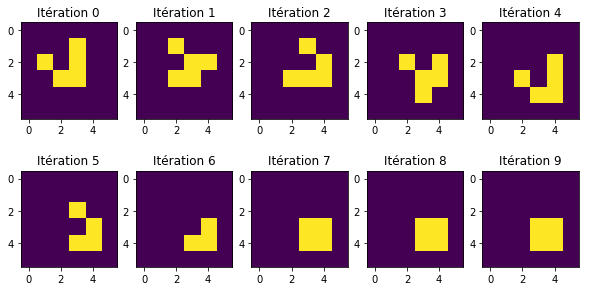

In [20]:
plt.figure(figsize = (10, 5))
Znew = [[0,0,0,0,0,0],
        [0,0,0,1,0,0],
        [0,1,0,1,0,0],
        [0,0,1,1,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0]]

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.array(Znew))
    Znew = iteration_jeu(Znew)
    plt.title("Itération " + str(i))
    


### Question 6: 
Que remarquez-vous entre l'itération 0 et l'itération 4 ? Que se passe-t-il après l'itération 7 ?


Nous observons une évolution des cellules jusqu'à l'itération 6 (incluse). Entre l'itération 0 et l'itération 4, le nombre de cellules vivantes est stable et égal à 5. Les formes se répètent. En effet, nous remarquons que la disposition des cellules vivantes est similaire pour les itérations 0, 2, 4, mais décalée, comme tel est le cas entre les itérations 0 et 4 où les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite. De plus, les cellules ont parfois changé de "sens" (rotation et symétrie) comme dans l'itération 2. Il en est de même pour les itérations 1 et 3 (même forme à une rotation puis une symétrie près).
A partir de l'itération 7, le jeu est stable et ne bougera donc plus. En effet, chaque cellule vivante possède trois voisins et reste donc en équilibre à l'itération suivante. Quant aux  cellules mortes, elles n'ont au plus que deux voisins, et ne peuvent donc pas naître. Il n'y aura ainsi aucune évolution dans les prochaines itérations.

## Implémentation avec numba

### Question 7 :

Nous allons maintenant reprendre la section précédente avec des fonctions utilisant numba et la compilation jit. Puis, nous comparerons les temps de calcul obtenus avec Numba (et la compilation jit), avec ceux obtenus dans la section précédente.

In [21]:
from numba import jit
import time

Nous allons définir dans le fichier utils.py les fonctions $calcul\_nb\_voisins\_jit$ et $iteration\_jeu\_jit$ qui utilisent numba et la compilation jit. Nous pourrons alors comparer les temps de calcul avec la section précédente de deux façons différentes. La première méthode utilisera $time.time()$ tandis que la deuxième méthode utilisera $\%timeit$ et fera donc une moyenne de plusieurs temps de calcul (pour chaque fonction).

Nous comparons les temps de calcul des fonctions $calcul\_nb\_voisins$ et $calcul\_nb\_voisins\_jit$.

In [22]:
# Temps pour la fonction calcul_nb_voisins sans numba et jit.

start = time.time()
calcul_nb_voisins(Z)
end = time.time()

print("Temps sans numba = %s" % (end - start))

Temps sans numba = 0.0010001659393310547


In [23]:
from utils import calcul_nb_voisins_jit

# Temps pour la fonction calcul_nb_voisins avec numba et jit.

# Compilation incluse :
start = time.time()
calcul_nb_voisins_jit(np.array(Z))
end = time.time()

print("Temps avec numba (avec compilation) = %s" % (end - start))


# Compilation non incluse : 
start = time.time()
calcul_nb_voisins_jit(np.array(Z))
end = time.time()

print("Temps avec numba (après compilation) = %s" % (end - start))

Temps avec numba (avec compilation) = 3.7672152519226074
Temps avec numba (après compilation) = 0.0


In [24]:
%timeit calcul_nb_voisins(Z)

29.1 µs ± 606 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%timeit calcul_nb_voisins_jit(np.array(Z))

11.8 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Nous constatons que le temps de calcul de la fonction $calcul\_nb\_voisins$ et bien plus faible que celui de la fonction $calcul\_nb\_voisins\_jit$. En effet, le temps de calcul de la fonction utilisant Numba et la compilation jit, est plus de deux fois plus élevé que celui de la fonction n'ayant pas cet apport.

Nous comparons maintenant les temps de calcul des fonctions $iteration\_jeu$ et $iteration\_jeu\_jit$.

In [27]:
# Temps pour la fonction iteration_jeu sans numba et jit.

start = time.time()
iteration_jeu(Z)
end = time.time()

print("Temps sans numba = %s" % (end - start))

Temps sans numba = 0.0


In [26]:
from utils import iteration_jeu_jit

# Temps pour la fonction calcul_nb_voisins avec numba et jit.

# Compilation incluse :
start = time.time()
iteration_jeu_jit(np.array(Z))
end = time.time()

print("Temps avec numba (avec compilation) = %s" % (end - start))


# Compilation non incluse : 
start = time.time()
iteration_jeu_jit(np.array(Z))
end = time.time()

print("Temps avec numba (après compilation) = %s" % (end - start))

Temps avec numba (avec compilation) = 0.5040287971496582
Temps avec numba (après compilation) = 0.0


In [28]:
%timeit iteration_jeu(Z)

37.4 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%timeit iteration_jeu_jit(np.array(Z))

10.6 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Nous observons que le temps de calcul de la fonction $iteration\_jeu$ et bien plus petit que celui de la fonction $iteration\_jeu\_jit$. En effet, le temps de calcul de la fonction utilisant Numba et la compilation jit, est plus de trois fois plus élevé que celui de la fonction n'ayant pas cet apport.

Les fonctions utilisant numba et la compilation jit ont un temps de calcul beaucoup moins élevé. Cet apport a donc permis de gagner en rapidité de calcul pour toutes les fonctions étudiées.

### Question 8 :

Nous allons créer un widget dont le curseur permet de contrôler les itérations du jeu de la vie lorsque nous initialisons avec la matrice suivante.

In [36]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


Nous commençons par créer la fonction $affichage\_jeu$ dans le fichier utils.py qui réalise un nombre d'itérations, donné en argument, du jeu de la vie en partant de la matrice initiale Z_huge. A l'issue de ces itérations du jeu de la vie, la fonction affiche l'état obtenu du jeu. A l'aide de cette fonction, nous pourrons alors créer le widget dont le curseur contrôle le nombre d'itérations.

In [44]:
def affichage_jeu(Etat_jeu, Iteration = 0):
    """
    Affichage du jeu après un certain nombre d'itérations (donné en argument) du jeu de la vie.
    """
    Z_iter = np.copy(Etat_jeu)
    plt.figure(figsize = (10, 5))
    for i in range(Iteration):
        Z_iter = iteration_jeu(Z_iter)
    plt.imshow(Z_iter)
    plt.title("Etape " + str(Iteration) + " du jeu de la vie")


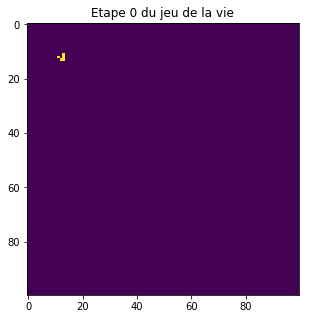

In [52]:
affichage_jeu(Z_huge, 0)

In [54]:
from ipywidgets import interact
from ipywidgets import fixed

interact(affichage_jeu, Etat_jeu = fixed(Z_huge) ,Iteration = (0, 30, 1));

interactive(children=(IntSlider(value=0, description='Iteration', max=30), Output()), _dom_classes=('widget-in…

Nous proposons de définir une nouvelle matrice initiale Z_huge_new afin de rendre le widget plus fluide et d'avoir une meilleure visualisation des états du jeu de la vie.

# EXERCICE 2 : Régression Logistique

Nous nous intéressons à la base de données MNIST qui représente les chiffres numérisés dont nous connaissons une étiquette (de 1 à 9).

### Question 1 : 

Nous chargeons la base de données MNIST à l'aide de la seconde commande proposée.

In [ ]:
import sklearn
sklearn.__version__ 

In [ ]:
from sklearn.datasets import fetch_openml

from random import randint

In [ ]:
mnist = fetch_openml('mnist_784')
# X = mnist.data.astype('float64')
# y = mnist.target.astype(np.int8)


In [ ]:
mnist.keys()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X

In [ ]:
y

Autre façon:

In [ ]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X

In [ ]:
y

### Question 2:
    
Nous transformons X et y pour ne garder que les cas des chiffres 3 et 7.

In [ ]:
classe_3 = np.array(y == 3)
classe_7 = np.array(y == 7)
classe_3_7 = classe_3 + classe_7

X_3_7 = X[classe_3_7]
y_3_7 = y[classe_3_7]


Visualisons avec imshow un exemple de chaque classe d'image (un X donc).

In [ ]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = (X_3_7[randint(0,len(X_3_7)-1)].reshape((28,28)))
    plt.imshow(img, cmap=plt.cm.gray)
    

### Question 3:

Utilisons la fonction LogisticRegression pour apprendre un modèle de classi􏰅fication sur l'intégralité des données. (on choisira un cas sans ordonnée à l'origine, i.e., l'option fit_intercept=False)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression(fit_intercept = False, solver='lbfgs')
#logisticRegr.fit(X_3_7, y_3_7)

from sklearn import linear_model
logisticRegr= linear_model.LogisticRegression(fit_intercept=False)
logisticRegr.fit(X_3_7, y_3_7)

Le modèle prédit alors la classe d'une image en considérant une image comme un vecteur $x$ et en choisissant l'une des deux classes selon le signe de $w^T x$, où $w$ est le vecteur appris par la méthode et stocké dans l'attribut .coef_. Soit: 

In [ ]:
w= logisticRegr.coef_

On observe la taille de W:

In [ ]:
w.shape

In [ ]:
X_3_7.shape

## Question 4:


In [ ]:
def fig_digit(x, w, alpha):
    
    #X doit être un vecteur de taille (1,784)
    xmod = x.reshape(1,784)- ( alpha * np.dot(w.T,x) * w /np.linalg.norm(w)**2 )
